### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
import tensorflow as tf

In [2]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

Using TensorFlow backend.


#### Collect Fashion mnist data from tf.keras.datasets 

In [3]:
%matplotlib inline
# Load/Prep the Data
(x_train, y_train_num), (x_test, y_test_num) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train_num, 10)
y_test = np_utils.to_categorical(y_test_num, 10)

print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11493376/11490434 [==============================] - 19s 2us/step
--- THE DATA ---
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Change train and test labels into one-hot vectors

#### Build the Graph

In [8]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

#### Initialize model, reshape & normalize data

In [9]:
    # Define the Type of Model
    model1 = Sequential()

    # Flatten Imgaes to Vector
    model1.add(Reshape((784,), input_shape=(28, 28, 1)))


#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [10]:
    # Layer 1
    model1.add(Dense(output_dim=200, init='he_normal', bias=True))
    model1.add(Activation("relu"))

    # Layer 2
    model1.add(Dense(output_dim=100, init='he_normal', bias=True))
    model1.add(Activation("relu"))


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=200, kernel_initializer="he_normal", use_bias=True)`
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=100, kernel_initializer="he_normal", use_bias=True)`
  


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [11]:
    # Layer Output
    model1.add(Dense(output_dim=10, init='he_normal', bias=True))
    model1.add(Activation("softmax"))

    # Loss and Optimizer
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    callback_list = [early_stopping]# [stats, early_stopping]

    # Train the model
    model1.fit(x_train, y_train, nb_epoch=EPOCHS, batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test), callbacks=callback_list, verbose=True)


Instructions for updating:
Use tf.cast instead.


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, kernel_initializer="he_normal", use_bias=True)`
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.2136 - acc: 0.9352 - val_loss: 0.1102 - val_acc: 0.9663
Epoch 2/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0881 - acc: 0.9731 - val_loss: 0.0822 - val_acc: 0.9743
Epoch 3/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0608 - acc: 0.9808 - val_loss: 0.0763 - val_acc: 0.9783
Epoch 4/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0458 - acc: 0.9853 - val_loss: 0.0837 - val_acc: 0.9763
Epoch 5/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0355 - acc: 0.9881 - val_loss: 0.0669 - val_acc: 0.9788
Epoch 6/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0280 - acc: 0.9907 - val_loss: 0.0736 - val_acc: 0.9808
Epoch 7/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0248 - acc: 0.9918 - val_loss: 0.0841 - val_acc

In [14]:
loss_and_metrics = model1.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 0s 19us/step
[0.07439810719971265, 0.9821]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [12]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### **Load CIFAR10 dataset**

In [16]:
%matplotlib inline
# Load/Prep the Data
(x_train, y_train_num), (x_test, y_test_num) = cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [17]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train_num, 10)
y_test = np_utils.to_categorical(y_test_num, 10)

print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [18]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images



### **Prepare/fit the generator.**

In [19]:
# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

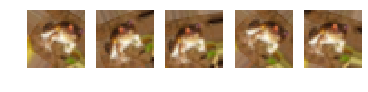

In [20]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()